In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.2f}'.format})

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
classifier  = KNeighborsClassifier()

In [28]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
classifier.score(X_test,y_test)

0.925

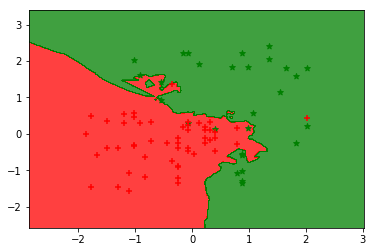

In [31]:
from matplotlib.colors import ListedColormap
x_set,y_set = X_test,y_test

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),

                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),

             alpha = 0.75,cmap = ListedColormap(('red','green')))
salary = []
age = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        salary.append(X_test[i,0])
        age.append(X_test[i,1])
plt.scatter(salary,age,color = 'green',marker = '*')

salary = []
age = []
for i in range(len(y_test)):
    if y_test[i] == 0:
        salary.append(X_test[i,0])
        age.append(X_test[i,1])
plt.scatter(salary,age,color = 'red',marker = '+')
